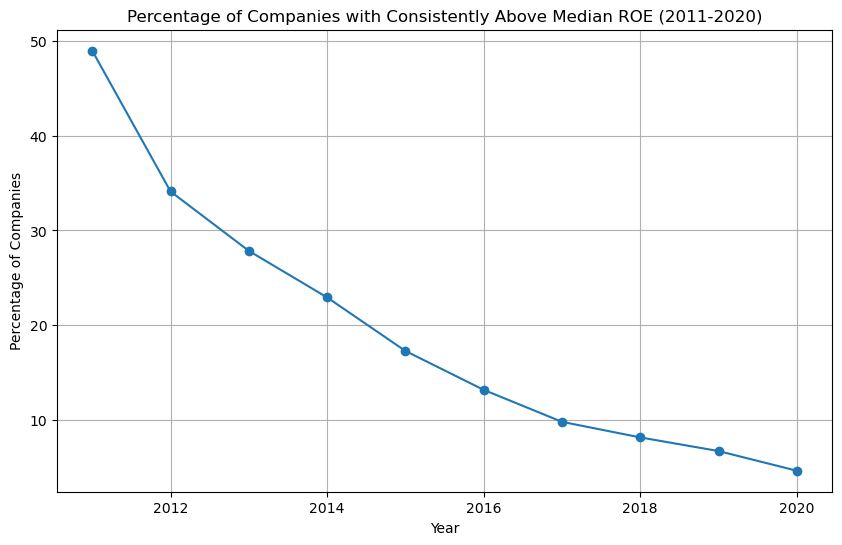

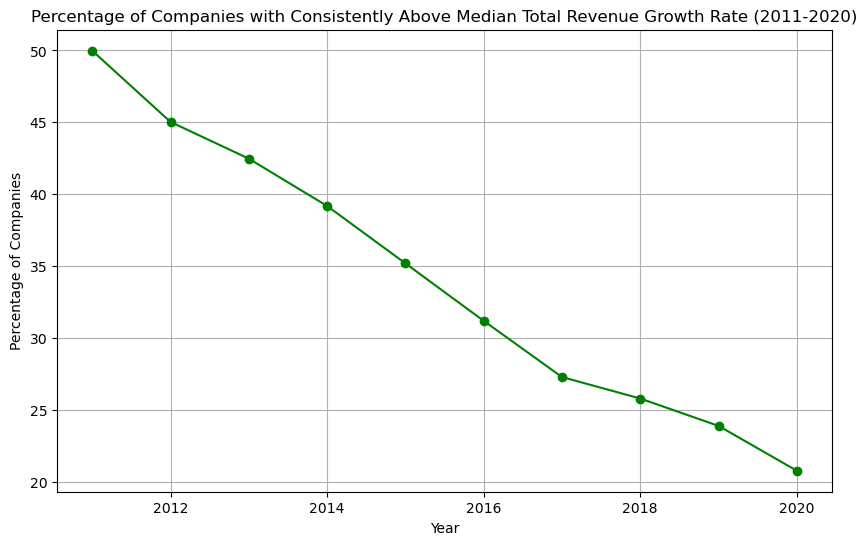

In [30]:
import pandas as pd

# Load the dataset
data = pd.read_csv('problem3_data.csv')

# Check the first few rows of the dataset to understand its structure
data.head()

# Convert EndDate to datetime and extract the year
data['Year'] = pd.to_datetime(data['EndDate']).dt.year

# Filter the dataset for the years 2011 to 2020
filtered_data = data[(data['Year'] >= 2011) & (data['Year'] <= 2020)]

# Calculate the ROE growth rate for each company from year to year
# We will first pivot the table to have years as columns for each Symbol
roe_pivot = filtered_data.pivot(index='Symbol', columns='Year', values='ROEC')

# Calculate the year-on-year ROE growth rate
roe_growth_rate = roe_pivot.pct_change(axis='columns')

# Now, calculate the median ROE growth rate for each year
roe_growth_rate_median = roe_growth_rate.median()

roe_growth_rate_median

# Initialize a dictionary to hold the percentage of companies with ROE consistently above the median for each year
percentage_above_median = {}

# Iterate through each year from 2011 to 2020
for year in range(2011, 2021):
    # For the first year, calculate the percentage of companies above the median ROE for that year
    if year == 2011:
        # Determine the median ROE for 2011
        median_roe_2011 = filtered_data[filtered_data['Year'] == 2011]['ROEC'].median()
        # Calculate the percentage of companies with ROE above the median
        companies_above_median_2011 = filtered_data[(filtered_data['Year'] == 2011) & (filtered_data['ROEC'] > median_roe_2011)]
        percentage_above_median[2011] = (companies_above_median_2011.shape[0] / filtered_data[filtered_data['Year'] == 2011].shape[0]) * 100
    else:
        # For subsequent years, calculate the percentage of companies with ROE above the median for all previous years including the current year
        symbols_above_median = set(companies_above_median_2011['Symbol'])  # Initialize with companies above median in 2011
        for y in range(2012, year + 1):
            median_roe = filtered_data[filtered_data['Year'] == y]['ROEC'].median()
            companies_above_median = filtered_data[(filtered_data['Year'] == y) & (filtered_data['ROEC'] > median_roe)]['Symbol']
            # Intersect the symbols to find those consistently above the median
            symbols_above_median = symbols_above_median.intersection(set(companies_above_median))
        
        # Calculate the percentage for the year
        total_companies = filtered_data[filtered_data['Year'] == year].shape[0]
        percentage_above_median[year] = (len(symbols_above_median) / total_companies) * 100

percentage_above_median

import matplotlib.pyplot as plt

# Convert the dictionary to a series for plotting
percentage_series = pd.Series(percentage_above_median, name="Percentage of Companies")

# Plotting
plt.figure(figsize=(10, 6))
percentage_series.plot(kind='line', marker='o')
plt.title('Percentage of Companies with Consistently Above Median ROE (2011-2020)')
plt.xlabel('Year')
plt.ylabel('Percentage of Companies')
plt.grid(True)
plt.show()

# Calculate the Total Revenue growth rate for each company from year to year using the filtered_data
total_revenue_pivot = filtered_data.pivot(index='Symbol', columns='Year', values='TotalRevenue')

# Calculate the year-on-year Total Revenue growth rate
total_revenue_growth_rate = total_revenue_pivot.pct_change(axis='columns')

# Now, calculate the median Total Revenue growth rate for each year
total_revenue_growth_rate_median = total_revenue_growth_rate.median()

total_revenue_growth_rate_median

# Initialize a dictionary to hold the percentage of companies with Total Revenue Growth Rate consistently above the median for each year
percentage_above_median_revenue = {}

# Iterate through each year from 2011 to 2020 for Total Revenue
for year in range(2011, 2021):
    # For the first year, calculate the percentage of companies above the median Total Revenue Growth Rate for that year
    if year == 2011:
        # Determine the median Total Revenue for 2011
        median_total_revenue_2011 = filtered_data[filtered_data['Year'] == 2011]['TotalRevenue'].median()
        # Calculate the percentage of companies with Total Revenue above the median
        companies_above_median_revenue_2011 = filtered_data[(filtered_data['Year'] == 2011) & (filtered_data['TotalRevenue'] > median_total_revenue_2011)]
        percentage_above_median_revenue[2011] = (companies_above_median_revenue_2011.shape[0] / filtered_data[filtered_data['Year'] == 2011].shape[0]) * 100
    else:
        # For subsequent years, calculate the percentage of companies with Total Revenue above the median for all previous years including the current year
        symbols_above_median_revenue = set(companies_above_median_revenue_2011['Symbol'])  # Initialize with companies above median in 2011
        for y in range(2012, year + 1):
            median_total_revenue = filtered_data[filtered_data['Year'] == y]['TotalRevenue'].median()
            companies_above_median_revenue = filtered_data[(filtered_data['Year'] == y) & (filtered_data['TotalRevenue'] > median_total_revenue)]['Symbol']
            # Intersect the symbols to find those consistently above the median
            symbols_above_median_revenue = symbols_above_median_revenue.intersection(set(companies_above_median_revenue))
        
        # Calculate the percentage for the year
        total_companies_revenue = filtered_data[filtered_data['Year'] == year].shape[0]
        percentage_above_median_revenue[year] = (len(symbols_above_median_revenue) / total_companies_revenue) * 100

percentage_above_median_revenue

# Convert the dictionary to a series for plotting the revenue data
percentage_series_revenue = pd.Series(percentage_above_median_revenue, name="Percentage of Companies")

# Plotting for Total Revenue
plt.figure(figsize=(10, 6))
percentage_series_revenue.plot(kind='line', marker='o', color='green')
plt.title('Percentage of Companies with Consistently Above Median Total Revenue Growth Rate (2011-2020)')
plt.xlabel('Year')
plt.ylabel('Percentage of Companies')
plt.grid(True)
plt.show()